In [1]:
import mdtraj as md
import MDAnalysis as mda
import MDAnalysis.analysis.rdf as rdf
import MDAnalysis.coordinates.timestep as ts
import MDAnalysis.transformations as transformations
import numpy as np
import matplotlib.pyplot as plt

/ext3/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Importing data 

data_protons = np.loadtxt('./../Runs/Protons/proton_aimd_1ns_every0.5fs-1.ener')
data_water = np.loadtxt('./../Runs/Water/water_aimd_1ns_every0.5fs-1.ener')

In [3]:
# Sorting data for energy plot

protons_pot_energy = data_protons[:,4]
protons_time = data_protons[:,1]
water_pot_energy = data_water[:,4]
water_time = data_water[:,1]

# Energy vs Time Plot

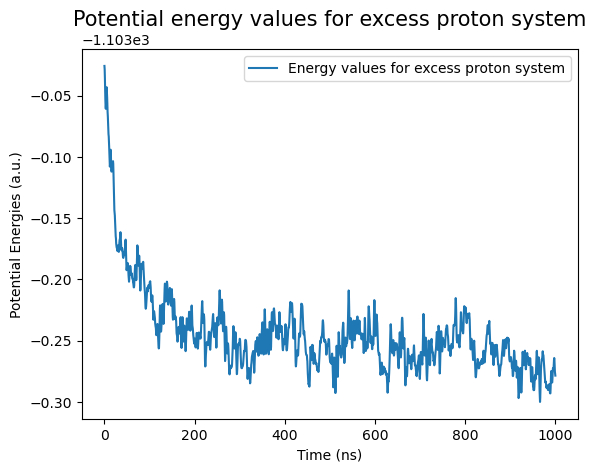

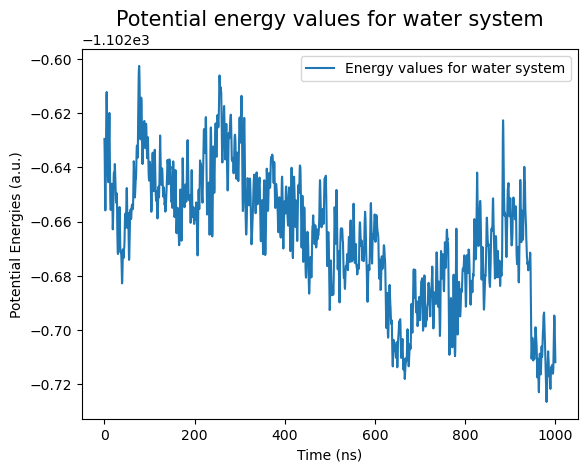

In [4]:
# Plotting data for energy vs. time for excess-proton and water systems


plt.plot(protons_time, protons_pot_energy, label = "Energy values for excess proton system")
plt.xlabel("Time (ns)")
plt.ylabel("Potential Energies (a.u.)")
plt.title("Potential energy values for excess proton system", fontsize = 15)
plt.legend()
plt.savefig("./../figures/energy-excess-proton-system.png")
plt.show()


plt.plot(water_time, water_pot_energy, label = "Energy values for water system")
plt.xlabel("Time (ns)")
plt.ylabel("Potential Energies (a.u.)")
plt.title("Potential energy values for water system", fontsize = 15)
plt.legend()
plt.savefig("./../figures/energy-water-system.png")
plt.show()

# RDF Plots

/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/base.py:438: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


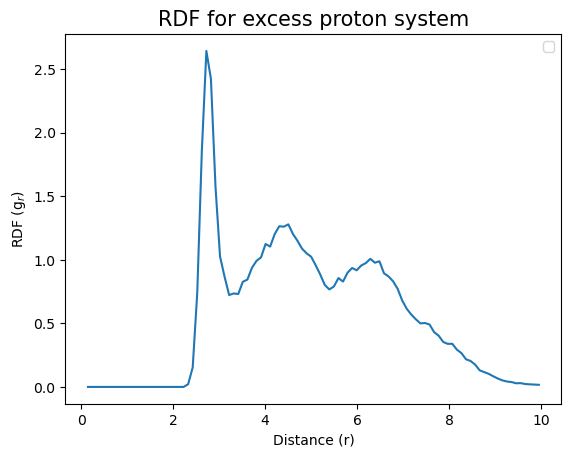

In [5]:
# Using MDAnalysis for analysing the RDF for excess proton system

box_dim = [12.42, 12.42, 12.42, 90, 90, 90]
transform = mda.transformations.boxdimensions.set_dimensions(box_dim)

proton_mda = mda.Universe('./../Runs/Protons/proton.xyz', './../Runs/Protons/proton_aimd_1ns_every0.5fs-pos-1.xyz')
proton_mda.trajectory.add_transformations(transform)

rdf_protons = rdf.InterRDF(proton_mda.select_atoms('name O'), proton_mda.select_atoms('name O'), nbins = 100, range=(0.1, 10))
rdf_protons.run()

plt.plot(rdf_protons.results.bins, rdf_protons.results.rdf)
#plt.plot(rdf_protons.bins, rdf_protons.rdf, label = "RDF$_{proton}$")
plt.legend()
plt.xlabel("Distance (r)")
plt.ylabel("RDF (g$_{r}$)")
plt.title("RDF for excess proton system", fontsize = 15)
plt.savefig("./../figures/rdf-excess-proton-system.png")
plt.show()

/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


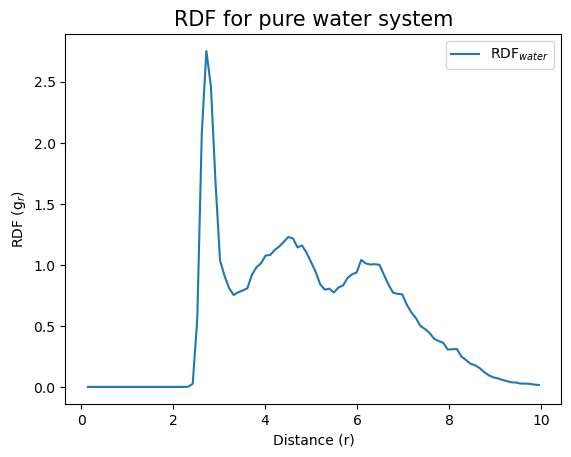

In [6]:
# Using MDAnalysis for analysing the RDF for pure water system

box_dim = [12.42, 12.42, 12.42, 90, 90, 90]
transform = mda.transformations.boxdimensions.set_dimensions(box_dim)

water_mda = mda.Universe('./../Runs/Water/water.xyz', './../Runs/Water/water_aimd_1ns_every0.5fs-pos-1.xyz')
water_mda.trajectory.add_transformations(transform)

rdf_water = rdf.InterRDF(water_mda.select_atoms('name O'), water_mda.select_atoms('name O'), nbins = 100, range=(0.1, 10))
rdf_water.run()

#plt.plot(rdf_water.results.bins, rdf_water.results.rdf)
plt.plot(rdf_water.bins, rdf_water.rdf, label = "RDF$_{water}$")
plt.legend()
plt.xlabel("Distance (r)")
plt.ylabel("RDF (g$_{r}$)")
plt.title("RDF for pure water system", fontsize = 15)
plt.savefig("./../figures/rdf-water-system.png")
plt.show()